# Kaggle: Facial Keypoints Detection

## Introduction
Goal: Predict keypoint positions on face images.

In [1]:
import pandas as pd
import numpy as np

## Step 1: Read the data into Pandas

In [2]:
# Data is pre-split into the training set, the test set, and a list of 27214 keypoints to 
# predict: training.csv, test.csv, IdLookupTable.csv

# The input image is given in the last field of the data files, and consists of a list of 
# pixels (ordered by row), as integers in (0,255). The images are 96x96 pixels.

# Read data into a DataFrames
faces = pd.read_csv('./data/training.csv')
new_faces = pd.read_csv('./data/test.csv')
lookup = pd.read_csv('./data/IdLookupTable.csv')

In [4]:
faces.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

In [5]:
faces.shape

(7049, 31)

In [6]:
faces.describe().T

/Users/laushon/anaconda/envs/sfdat26/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count       mean       std        min        25%  \
left_eye_center_x          7039.0  66.359021  3.448233  22.763345        NaN   
left_eye_center_y          7039.0  37.651234  3.152926   1.616512        NaN   
right_eye_center_x         7036.0  30.306102  3.083230   0.686592        NaN   
right_eye_center_y         7036.0  37.976943  3.033621   4.091264        NaN   
left_eye_inner_corner_x    2271.0  59.159339  2.690354  19.064954        NaN   
left_eye_inner_corner_y    2271.0  37.944752  2.307332  27.190098        NaN   
left_eye_outer_corner_x    2267.0  73.330478  3.405852  27.571879        NaN   
left_eye_outer_corner_y    2267.0  37.707008  2.881438  26.250023        NaN   
right_eye_inner_corner_x   2268.0  36.652607  2.350268   5.751046        NaN   
right_eye_inner_corner_y   2268.0  37.989902  2.311907  26.250023        NaN   
right_eye_outer_corner_x   2268.0  22.384504  3.057122   3.980117        NaN   
right_eye_outer_corner_y   2268.0  38.033495  2.910368  25.123828        NaN   
left_eyebrow_inner_end_x   2270.0  56.068513  3.485485  17.888717        NaN   
left_eyebrow_inner_end_y   2270.0  29.332678  3.078134  15.859361        NaN   
left_eyebrow_outer_end_x   2225.0  79.482826  3.986224  32.206432        NaN   
left_eyebrow_outer_end_y   2225.0  29.734861  3.773744  10.522325        NaN   
right_eyebrow_inner_end_x  2270.0  39.322137  3.209641   6.921014        NaN   
right_eyebrow_inner_end_y  2270.0  29.502998  3.106869  16.476000        NaN   
right_eyebrow_outer_end_x  2236.0  15.871177  3.622533   3.826243        NaN   
right_eyebrow_outer_end_y  2236.0  30.428166  3.865772  13.224453        NaN   
nose_tip_x                 7049.0  48.374186  4.280038  12.944699  46.602370   
nose_tip_y                 7049.0  62.715884  5.720567  17.932414  59.292697   
mouth_left_corner_x        2269.0  63.285735  4.079063  22.923362        NaN   
mouth_left_corner_y        2269.0  75.970714  4.579724  57.023258        NaN   
mouth_right_corner_x       2270.0  32.900404  3.964552   2.245766        NaN   
mouth_right_corner_y       2270.0  76.179768  4.417814  56.690208        NaN   
mouth_center_top_lip_x     2275.0  47.975412  3.323060  12.605173        NaN   
mouth_center_top_lip_y     2275.0  72.919443  5.222500  56.719043        NaN   
mouth_center_bottom_lip_x  7016.0  48.569472  4.269961  12.536477        NaN   
mouth_center_bottom_lip_y  7016.0  78.970146  5.407844  25.850503        NaN   

                                 50%        75%        max  
left_eye_center_x                NaN        NaN  94.689280  
left_eye_center_y                NaN        NaN  80.502649  
right_eye_center_x               NaN        NaN  85.039381  
right_eye_center_y               NaN        NaN  81.270911  
left_eye_inner_corner_x          NaN        NaN  84.440991  
left_eye_inner_corner_y          NaN        NaN  66.562559  
left_eye_outer_corner_x          NaN        NaN  95.258090  
left_eye_outer_corner_y          NaN        NaN  64.618230  
right_eye_inner_corner_x         NaN        NaN  70.714966  
right_eye_inner_corner_y         NaN        NaN  69.808803  
right_eye_outer_corner_x         NaN        NaN  61.428580  
right_eye_outer_corner_y         NaN        NaN  70.746797  
left_eyebrow_inner_end_x         NaN        NaN  79.787831  
left_eyebrow_inner_end_y         NaN        NaN  60.875896  
left_eyebrow_outer_end_x         NaN        NaN  94.269957  
left_eyebrow_outer_end_y         NaN        NaN  60.500298  
right_eyebrow_inner_end_x        NaN        NaN  76.582388  
right_eyebrow_inner_end_y        NaN        NaN  62.083177  
right_eyebrow_outer_end_x        NaN        NaN  58.418216  
right_eyebrow_outer_end_y        NaN        NaN  66.751329  
nose_tip_x                 48.424713  50.330437  89.438592  
nose_tip_y                 63.451421  66.492686  95.935644  
mouth_left_corner_x              NaN        NaN  84.767123  
mouth_left_corner_y              NaN        NaN  94.673637  
mouth_right_corner_x  

In [7]:
faces.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [8]:
faces.head(1)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   

   right_eye_inner_corner_y  \
0                 37.389402   

                         ...                          nose_tip_y  \
0                        ...                           57.066803   

   mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0            61.195308            79.970165             28.614496   

   mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
0             77.388992               43.312602               72.935459   

   mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
0                  43.130707                  84.485774   

                                               Image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  

[1 rows x 31 columns]

In [9]:
faces.Image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

## Step 2: Preprocessing
- Missing data
- image processing

**Missing a lot of data.**<br>
Options:
1. Delete rows with missing data
2. Two models: one for eye centers and one for everything
3. Use ml to generate the missing data from the eye centers

Let's just delete the rows for now.

In [10]:
faces.dropna(inplace=True)

In [11]:
faces.shape

(2140, 31)

In [12]:
faces.rename(columns = {'Image':'image'}, inplace=True)

In [13]:
faces.head(1)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   

   right_eye_inner_corner_y  \
0                 37.389402   

                         ...                          nose_tip_y  \
0                        ...                           57.066803   

   mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0            61.195308            79.970165             28.614496   

   mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
0             77.388992               43.312602               72.935459   

   mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
0                  43.130707                  84.485774   

                                               image  
0  238 236 237 238 240 240 239 241 241 243 240 23...  

[1 rows x 31 columns]

In [14]:
# Change image column into a numpy array
faces.image = faces.image.apply(lambda im: np.fromstring(im, sep=' '))

In [15]:
faces.head(1)

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          66.033564          39.002274           30.227008   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.421678                59.582075                39.647423   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                73.130346                39.969997                 36.356571   

   right_eye_inner_corner_y  \
0                 37.389402   

                         ...                          nose_tip_y  \
0                        ...                           57.066803   

   mouth_left_corner_x  mouth_left_corner_y  mouth_right_corner_x  \
0            61.195308            79.970165             28.614496   

   mouth_right_corner_y  mouth_center_top_lip_x  mouth_center_top_lip_y  \
0             77.388992               43.312602               72.935459   

   mouth_center_bottom_lip_x  mouth_center_bottom_lip_y  \
0                  43.130707                  84.485774   

                                               image  
0  [238.0, 236.0, 237.0, 238.0, 240.0, 240.0, 239...  

[1 rows x 31 columns]

In [16]:
new_faces.rename(columns = {'Image':'image'}, inplace=True)
new_faces.image = new_faces.image.apply(lambda im: np.fromstring(im, sep=' '))

In [17]:
new_faces.head(1)

ImageId                                              image
0        1  [182.0, 183.0, 182.0, 182.0, 180.0, 180.0, 176...

In [18]:
faces.image[0]

array([ 238.,  236.,  237., ...,   70.,   75.,   90.])

In [19]:
# Define X and y

In [20]:
# X = faces.image
X = np.vstack(faces.ix[:, 'image']).astype(np.float)

In [21]:
X[0]

array([ 238.,  236.,  237., ...,   70.,   75.,   90.])

In [22]:
y = faces.drop('image', axis=1).values

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [24]:
X_train[0]

array([ 38.,  37.,  37., ...,   9.,  13.,   7.])

In [25]:
X.shape

(2140, 9216)

In [26]:
y_train.shape

(1605, 30)

In [27]:
X_train.shape

(1605, 9216)

## Step 3: Model building
- Explore options

### K-Nearest Neighbors
Just to get a feel for things. Multiple y values, Hmmm.

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [29]:
knn = KNeighborsRegressor(5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [31]:
y_pred = knn.predict(X_test)

In [32]:
from sklearn import metrics

In [33]:
print metrics.mean_squared_error(y_test, y_pred)

6.16462922055


In [35]:
# To visualize each image, we thus need to first convert these 9216 integers into a 
# 96x96 matrix

im = X_train[0].reshape(96, 96)

In [36]:
im.shape

(96, 96)

In [37]:
# kylemcdonald/showarray.py

import PIL.Image
from cStringIO import StringIO
import IPython.display
import numpy as np
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

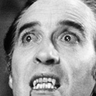

In [38]:
showarray(im)

In [ ]:
# With matplotlib

In [39]:
%matplotlib inline

In [40]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

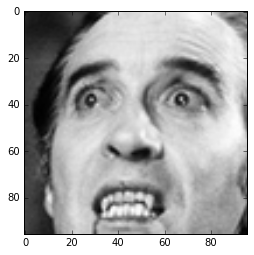

In [42]:
imgplot = plt.imshow(im, cmap='gray')

In [47]:
# Start again
images = pd.read_csv('./data/training.csv')

In [49]:
# Change image column into a numpy array
images.Image = images.Image.apply(lambda im: np.fromstring(im, sep=' '))

In [52]:
images.pic = images.Image.apply(lambda im: im.reshape(96, 96))

In [54]:
images.shape

(7049, 31)

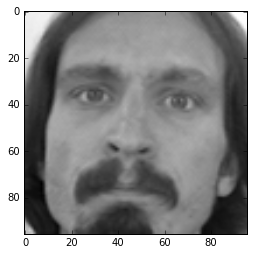

In [55]:
imgplot = plt.imshow(images.pic[0], cmap='gray')

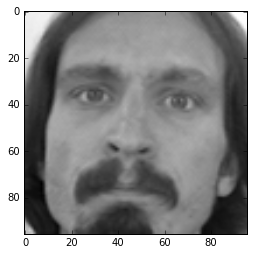

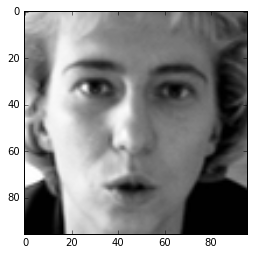

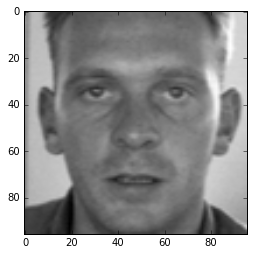

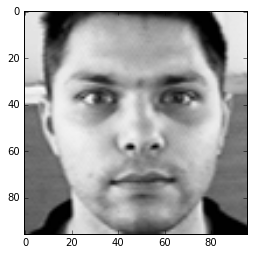

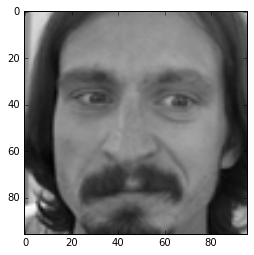

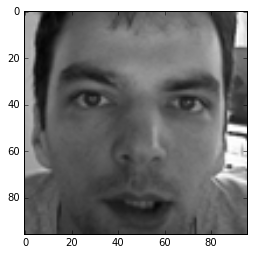

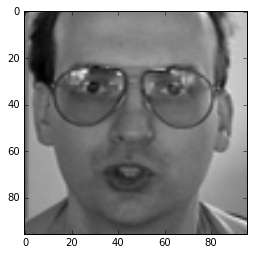

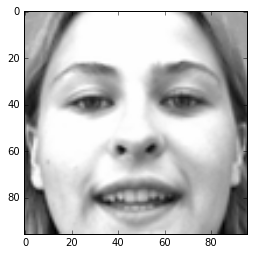

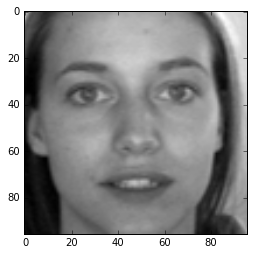

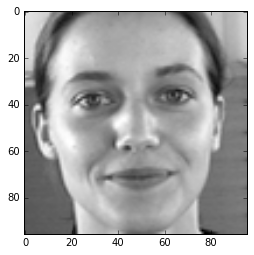

In [59]:
for i in range(0, 10):
    plt.imshow(images.pic[i], cmap='gray')
    plt.show()

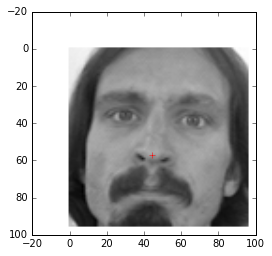

In [79]:
plt.imshow(images.pic[0], cmap='gray')
plt.plot(images.nose_tip_x[0], images.nose_tip_y[0], 'r+')
#plt.show()

# Why am I getting the white space?

In [63]:
images.nose_tip_x[0], images.nose_tip_y[0]

(44.420571428599999, 57.066803007499999)

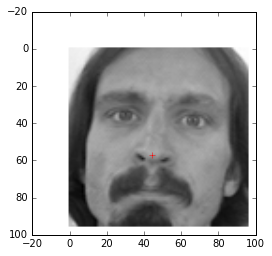

In [84]:
plt.imshow(images.pic[0], cmap='gray')
plt.plot(images.nose_tip_x[0], images.nose_tip_y[0], 'r+')



In [85]:
keypoints = images.drop('Image', axis=1)
keypoints

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0             66.033564          39.002274           30.227008   
1             64.332936          34.970077           29.949277   
2             65.057053          34.909642           30.903789   
3             65.225739          37.261774           32.023096   
4             66.725301          39.621261           32.244810   
5             69.680748          39.968748           29.183551   
6             64.131866          34.290040           29.578953   
7             67.468893          39.413452           29.355961   
8             65.802880          34.755200           27.475840   
9             64.121231          36.740308           29.468923   
10            65.230189          34.342642           28.802717   
11            66.737600          39.886400           30.270400   
12            66.574737          37.308000           30.445263   
13            65.270588          34.940235           33.022745   
14            66.607158          38.938105           28.596211   
15            68.491294          35.900235           27.831216   
16            66.676941          33.941224           30.713647   
17            66.850428          35.636988           32.528110   
18            67.839508          38.597908           28.016738   
19            69.233455          40.021527           25.550836   
20            65.595600          36.626400           31.540800   
21            64.762466          34.933389           31.859729   
22            66.082737          37.153705           27.978316   
23            64.718582          35.861225           31.590684   
24            66.334316          33.721263           29.077053   
25            64.553043          36.524174           32.219826   
26            65.318400          35.270400           30.309581   
27            65.459410          38.908564           32.051410   
28            65.376914          38.128914           29.215543   
29            72.353185          34.417067           28.655407   
...                 ...                ...                 ...   
7019          65.608426          37.621361           31.264294   
7020          61.997236          37.275785           31.425382   
7021          64.906070          41.810233           30.580251   
7022          67.045141          41.737408           29.858731   
7023          60.202057          37.743474           38.649143   
7024          72.226237          40.046442           33.046199   
7025          67.724141          38.875991           29.399228   
7026          63.013300          36.053600           28.746900   
7027          67.277867          37.383176           29.176630   
7028          65.840046          39.123796           29.494006   
7029          69.463223          41.038651           33.892709   
7030          64.392940          38.225240           29.210039   
7031          67.367709          38.048844           28.682327   
7032          68.320900          36.832620           29.197740   
7033          66.162021          35.930851           33.100496   
7034          66.651927          37.332655           29.296625   
7035          70.504914          35.783406           32.182297   
7036          71.258174          39.744607           33.465219   
7037          69.616217          38.049497           29.493977   
7038          64.615524          35.165319           26.707200   
7039          69.229935          38.575634           29.407912   
7040          63.352951          35.671311           33.952078   
7041          65.711151          38.843545           32.268751   
7042          67.929319          35.846552           28.687820   
7043          66.867222          37.356855           30.750926   
7044          67.402546          31.842551           29.746749   
7045          66.134400          38.365501           30.478626   
7046          66.690732          36.845221           31.666420   
7047          70.965082          39.853666    

In [92]:
a = keypoints.values.tolist()
# pairs = zip(keypoints[0][0::2], keypoints[0][1::2])

In [93]:
a

[[66.0335639098,
  39.0022736842,
  30.2270075188,
  36.4216781955,
  59.582075188000005,
  39.647422556399995,
  73.1303458647,
  39.9699969925,
  36.3565714286,
  37.3894015038,
  23.4528721805,
  37.3894015038,
  56.9532631579,
  29.0336481203,
  80.2271278195,
  32.2281383459,
  40.2276090226,
  29.0023218045,
  16.3563789474,
  29.6474706767,
  44.4205714286,
  57.0668030075,
  61.1953082707,
  79.9701654135,
  28.6144962406,
  77.38899248119999,
  43.3126015038,
  72.9354586466,
  43.1307067669,
  84.4857744361],
 [64.3329361702,
  34.9700765957,
  29.949276595700002,
  33.4487148936,
  58.856170212799995,
  35.2743489362,
  70.7227234043,
  36.1871659574,
  36.034723404299996,
  34.3615319149,
  24.472510638299998,
  33.1444425532,
  53.9874042553,
  28.2759489362,
  78.634212766,
  30.405923404299998,
  42.7288510638,
  26.1460425532,
  16.8653617021,
  27.058859574499998,
  48.2062978723,
  55.6609361702,
  56.4214468085,
  76.352,
  35.122382978699996,
  76.0476595745,
  46.6

In [94]:
pairs = zip(a[0][0::2], a[0][1::2])
pairs

[(66.0335639098, 39.0022736842),
 (30.2270075188, 36.4216781955),
 (59.582075188000005, 39.647422556399995),
 (73.1303458647, 39.9699969925),
 (36.3565714286, 37.3894015038),
 (23.4528721805, 37.3894015038),
 (56.9532631579, 29.0336481203),
 (80.2271278195, 32.2281383459),
 (40.2276090226, 29.0023218045),
 (16.3563789474, 29.6474706767),
 (44.4205714286, 57.0668030075),
 (61.1953082707, 79.9701654135),
 (28.6144962406, 77.38899248119999),
 (43.3126015038, 72.9354586466),
 (43.1307067669, 84.4857744361)]

In [1]:
plt.imshow(images.pic[0], cmap='gray')
[plt.plot(pair[0], pair[1], 'r+') for pair in pairs]
# plt.subplots_adjust(left=0.0, right=96, top=96, bottom=0)

NameError: name 'plt' is not defined